<a href="https://colab.research.google.com/github/gemstoneyang/2023_Machine_Learning/blob/main/Exercise_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree
**by. 18012635 양원석(Wonseok Yang)**

---

## 1. Load the Iris flower dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

# Joining data with target labels
iris_data = np.concatenate([iris['data'], np.reshape(iris['target'], (-1, 1))], axis=1)

# Create the dataframe
df = pd.DataFrame(data=iris_data, columns=iris['feature_names'] + ['target'])

print('Data shape:', df.shape)
print('Target classes:', df['target'].unique())
print('Sample data: \n')
df.head()

Data shape: (150, 5)
Target classes: [0. 1. 2.]
Sample data: 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## 2. Split the dataset

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset 70:30, training:test
# Stratify based on 'target'
df_train, df_test = train_test_split(df, stratify=df['target'].values, test_size=0.30, random_state=0)

# Training data and labels
X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']

# Test data and labels
X_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (105, 4)
Test data shape:  (45, 4)


## 3. DecisionTreeClassifier in scikit-learn
*sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=2)*

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize decision tree classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=2, random_state=2023)

# Train decision tree classifier
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc,3))

Accuracy: 0.956


## 4. Visualization of the classification results

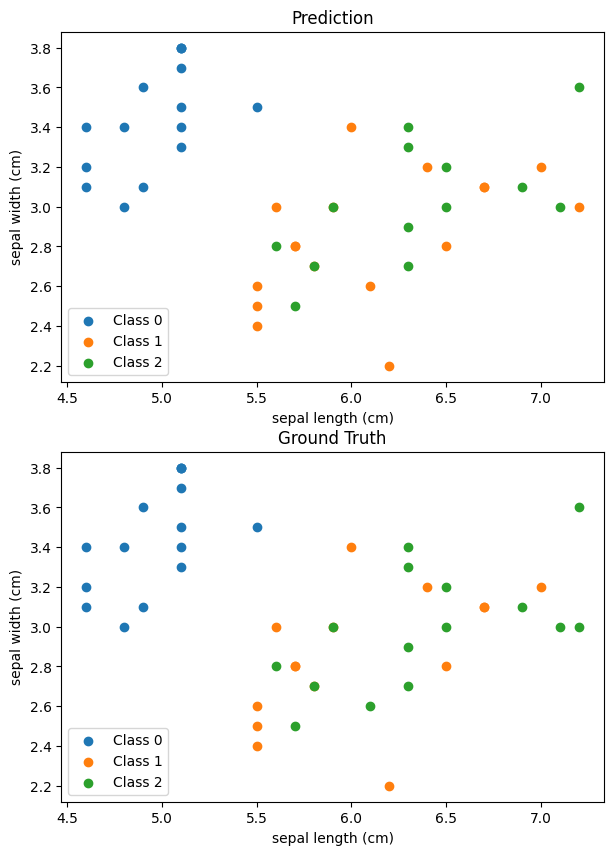

In [5]:
import matplotlib.pyplot as plt

def draw_classification_result(y_pred):
  X_test_sl = X_test['sepal length (cm)']
  X_test_sw = X_test['sepal width (cm)']

  fig, ax = plt.subplots(2,figsize=(7,10))
  ax[0].title.set_text('Prediction')
  ax[0].scatter(X_test_sl[y_pred==0], X_test_sw[y_pred==0],label='Class 0')
  ax[0].scatter(X_test_sl[y_pred==1], X_test_sw[y_pred==1],label='Class 1')
  ax[0].scatter(X_test_sl[y_pred==2], X_test_sw[y_pred==2],label='Class 2')
  ax[0].set_xlabel('sepal length (cm)'); ax[0].set_ylabel('sepal width (cm)');

  ax[1].title.set_text('Ground Truth')
  ax[1].scatter(X_test_sl[y_test==0], X_test_sw[y_test==0],label ='Class 0')
  ax[1].scatter(X_test_sl[y_test==1], X_test_sw[y_test==1],label ='Class 1')
  ax[1].scatter(X_test_sl[y_test==2], X_test_sw[y_test==2],label ='Class 2')
  ax[1].set_xlabel('sepal length (cm)'); ax[1].set_ylabel('sepal width (cm)');

  ax[0].legend(); ax[1].legend(); plt.show();

draw_classification_result(y_pred)

## 5. Visualization of the decision tree

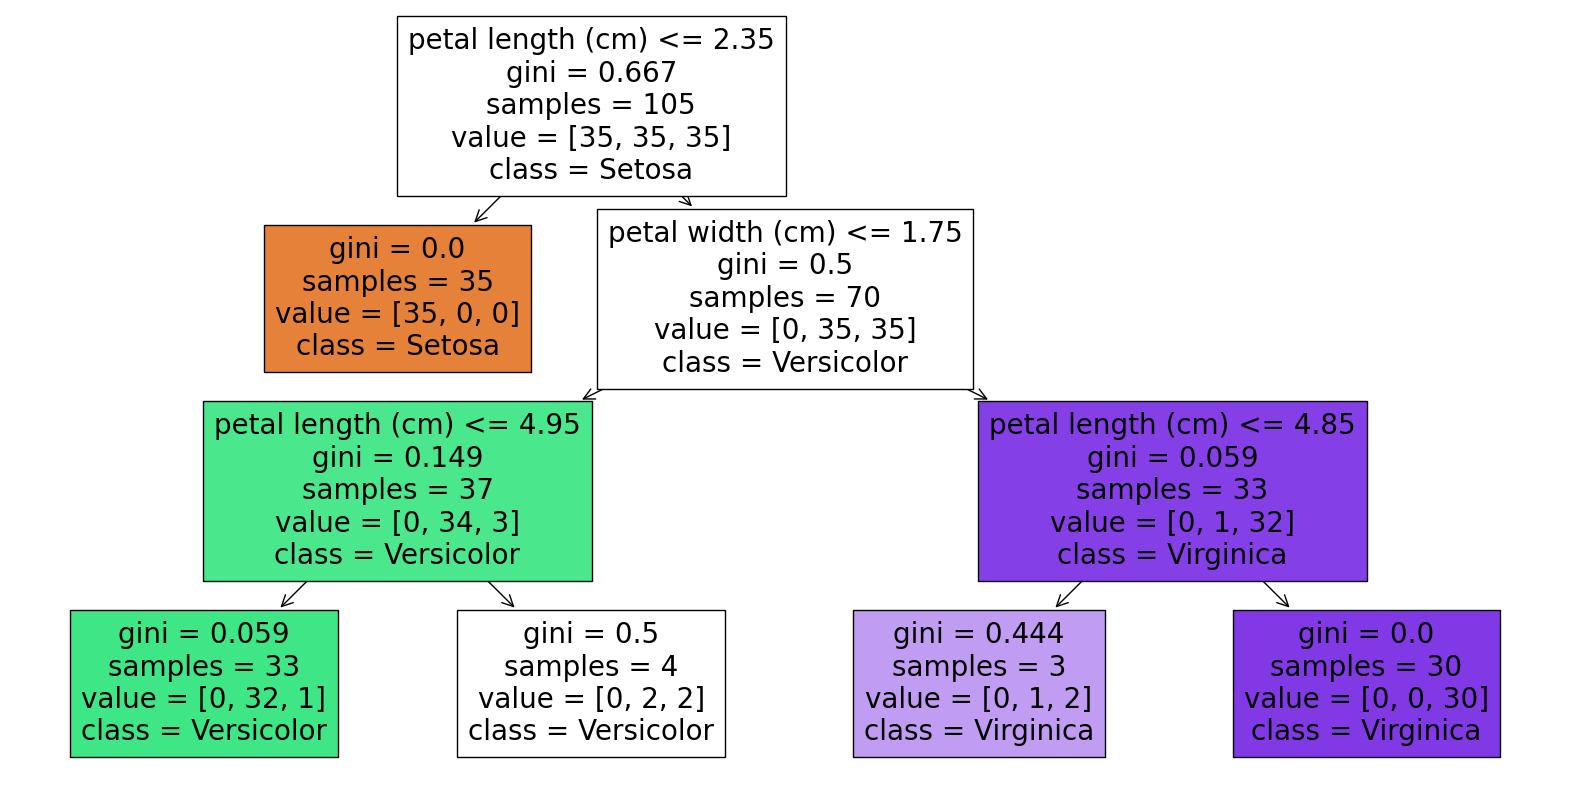

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the tree
plt.figure(figsize=(20,10))
feature_names = X_train.columns
plot_tree(model, feature_names=feature_names, filled=True,class_names=['Setosa','Versicolor','Virginica'])
plt.show()

# Exercise 14: Train a DecisionTreeClassifier on the Wine Dataset
## 1. Load the Wine dataset

In [7]:
from sklearn.datasets import load_wine
import pandas as pd

wine_data = load_wine(as_frame=True)
feature_name = ['alcohol','malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins','color_intensity','hue', 'od280/od315_of_diluted_wines', 'proline']

df = pd.DataFrame(wine_data.data, columns=feature_name)
df['class'] = wine_data['target']
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. Split the dataset

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset 70:30, training:test
# Stratify based on 'class'
df_train, df_test = train_test_split(df, stratify=df['class'].values, test_size=0.30, random_state=0)

# Training data and labels
X_train = df_train.drop(['class'], axis=1)
y_train = df_train['class']

# Test data and labels
X_test = df_test.drop(['class'], axis=1)
y_test = df_test['class']

print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (124, 13)
Test data shape:  (54, 13)


## 3. DecisionTreeClassifier in scikit-learn

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize decision tree classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=2, random_state=2023)

# Train decision tree classifier
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc,3))

Accuracy: 0.926


## 4. Visualization of the classification results

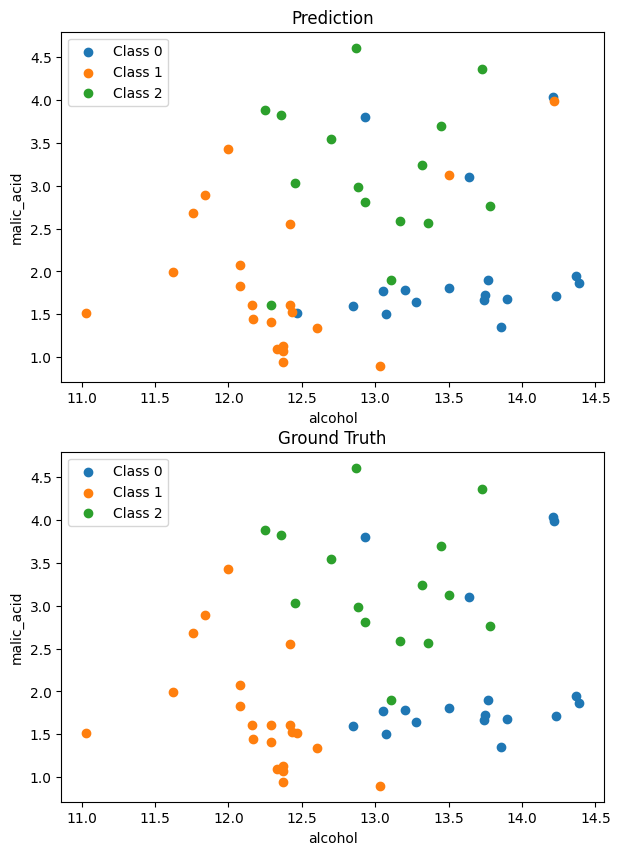

In [12]:
import matplotlib.pyplot as plt

def draw_classification_result(y_pred):
  X_test_sl = X_test['alcohol']
  X_test_sw = X_test['malic_acid']

  fig, ax = plt.subplots(2,figsize=(7,10))
  ax[0].title.set_text('Prediction')
  ax[0].scatter(X_test_sl[y_pred==0], X_test_sw[y_pred==0],label='Class 0')
  ax[0].scatter(X_test_sl[y_pred==1], X_test_sw[y_pred==1],label='Class 1')
  ax[0].scatter(X_test_sl[y_pred==2], X_test_sw[y_pred==2],label='Class 2')
  ax[0].set_xlabel('alcohol'); ax[0].set_ylabel('malic_acid');

  ax[1].title.set_text('Ground Truth')
  ax[1].scatter(X_test_sl[y_test==0], X_test_sw[y_test==0],label ='Class 0')
  ax[1].scatter(X_test_sl[y_test==1], X_test_sw[y_test==1],label ='Class 1')
  ax[1].scatter(X_test_sl[y_test==2], X_test_sw[y_test==2],label ='Class 2')
  ax[1].set_xlabel('alcohol'); ax[1].set_ylabel('malic_acid');

  ax[0].legend(); ax[1].legend(); plt.show();

draw_classification_result(y_pred)

## 5. Visualization of the decision tree

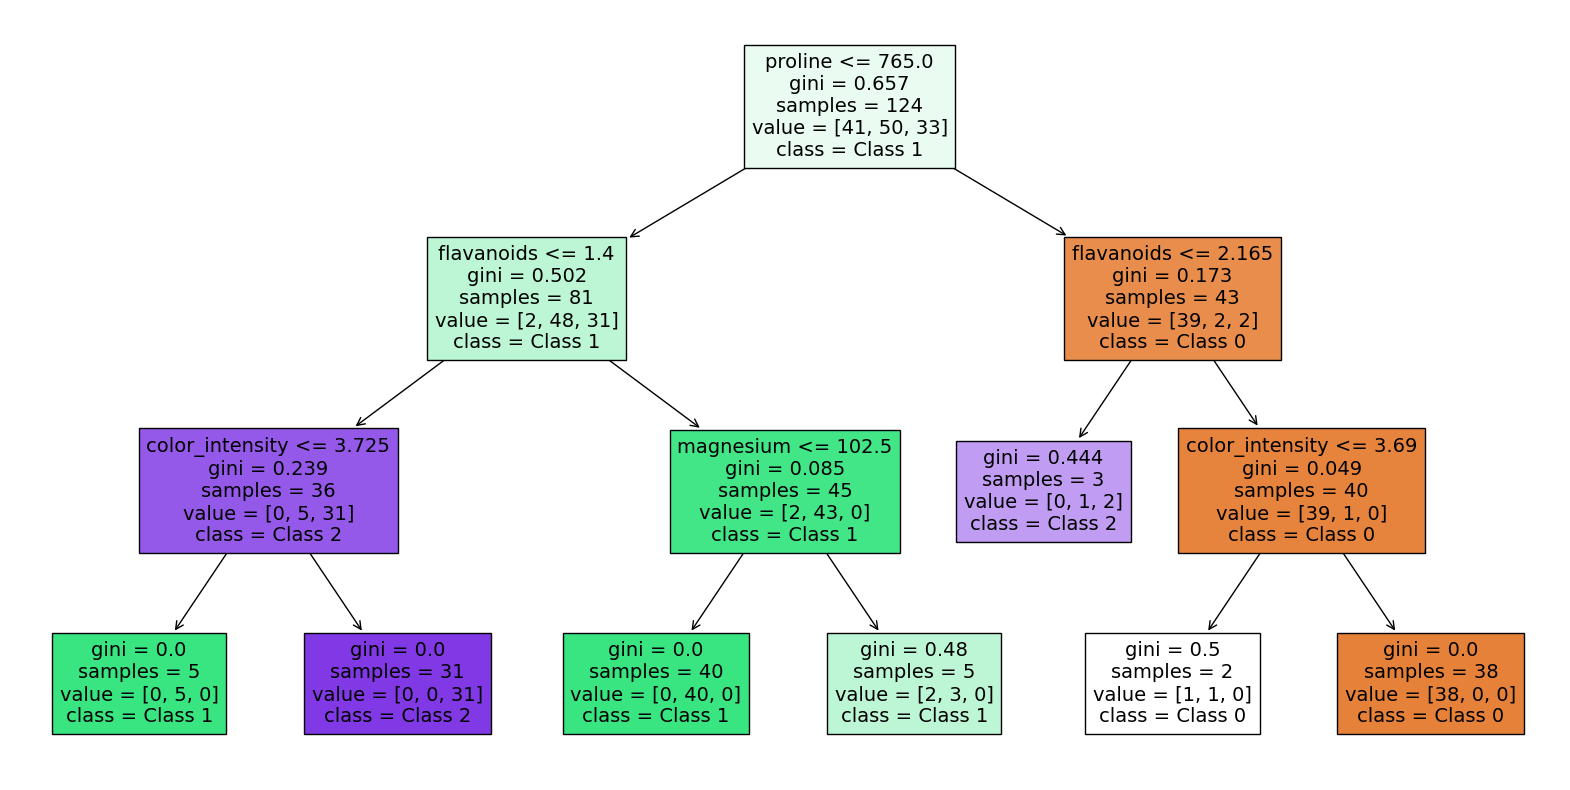

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the tree
plt.figure(figsize=(20,10))
feature_names = X_train.columns
plot_tree(model, feature_names=feature_names, filled=True,class_names=['Class 0','Class 1','Class 2'])
plt.show()

## 6. Change depth of the decision tree

Accuracy: 0.944


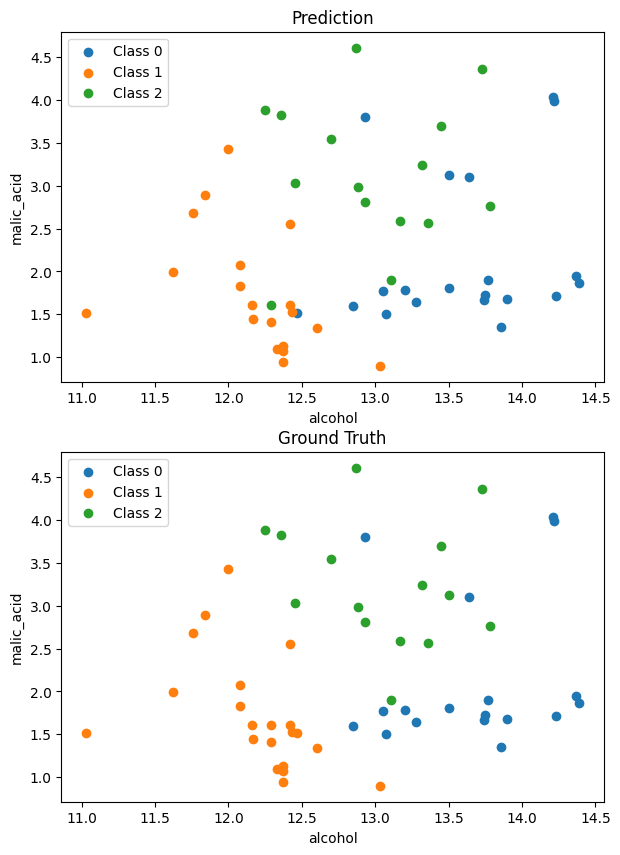

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize decision tree classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=2, min_samples_leaf=2, random_state=2023)

# Train decision tree classifier
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc,3))

# Visualization
draw_classification_result(y_pred)

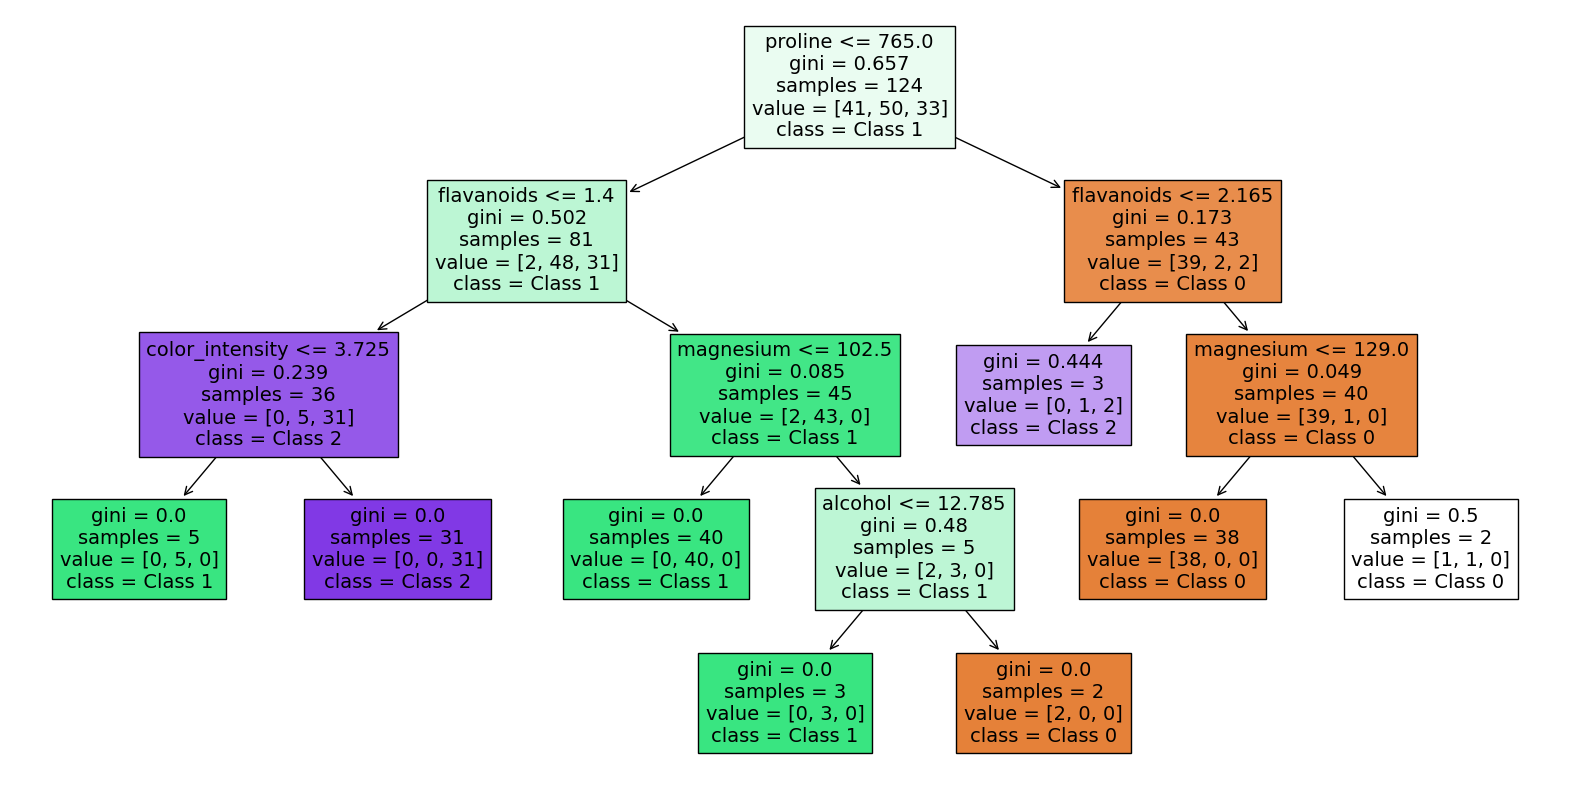

In [29]:
# Visualize the tree
plt.figure(figsize=(20,10))
feature_names = X_train.columns
plot_tree(model, feature_names=feature_names, filled=True,class_names=['Class 0','Class 1','Class 2'])
plt.show()

## 7. Change criterion of the decision tree
### 1) entropy

Accuracy: 0.963


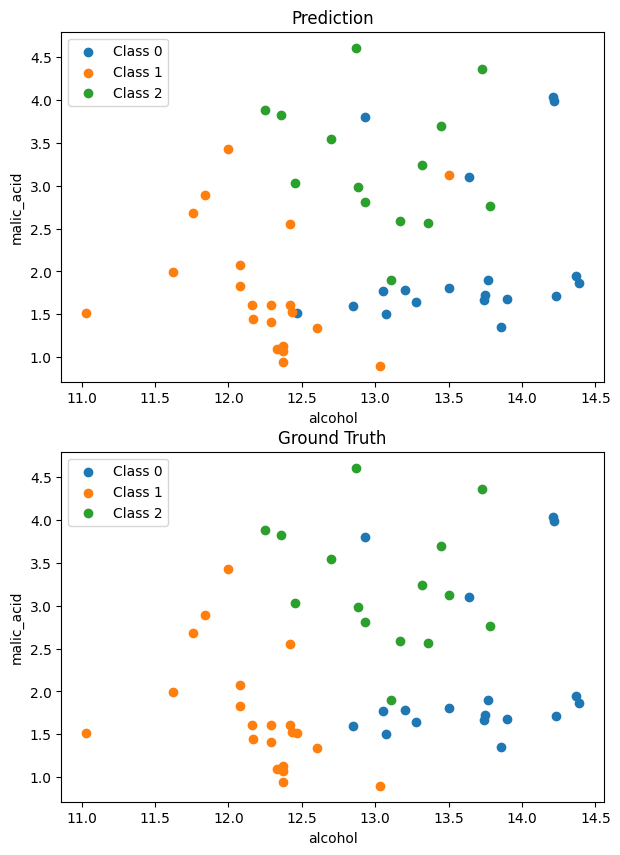

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=2, random_state=2023)

# Train decision tree classifier
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc,3))

# Visualization
draw_classification_result(y_pred)

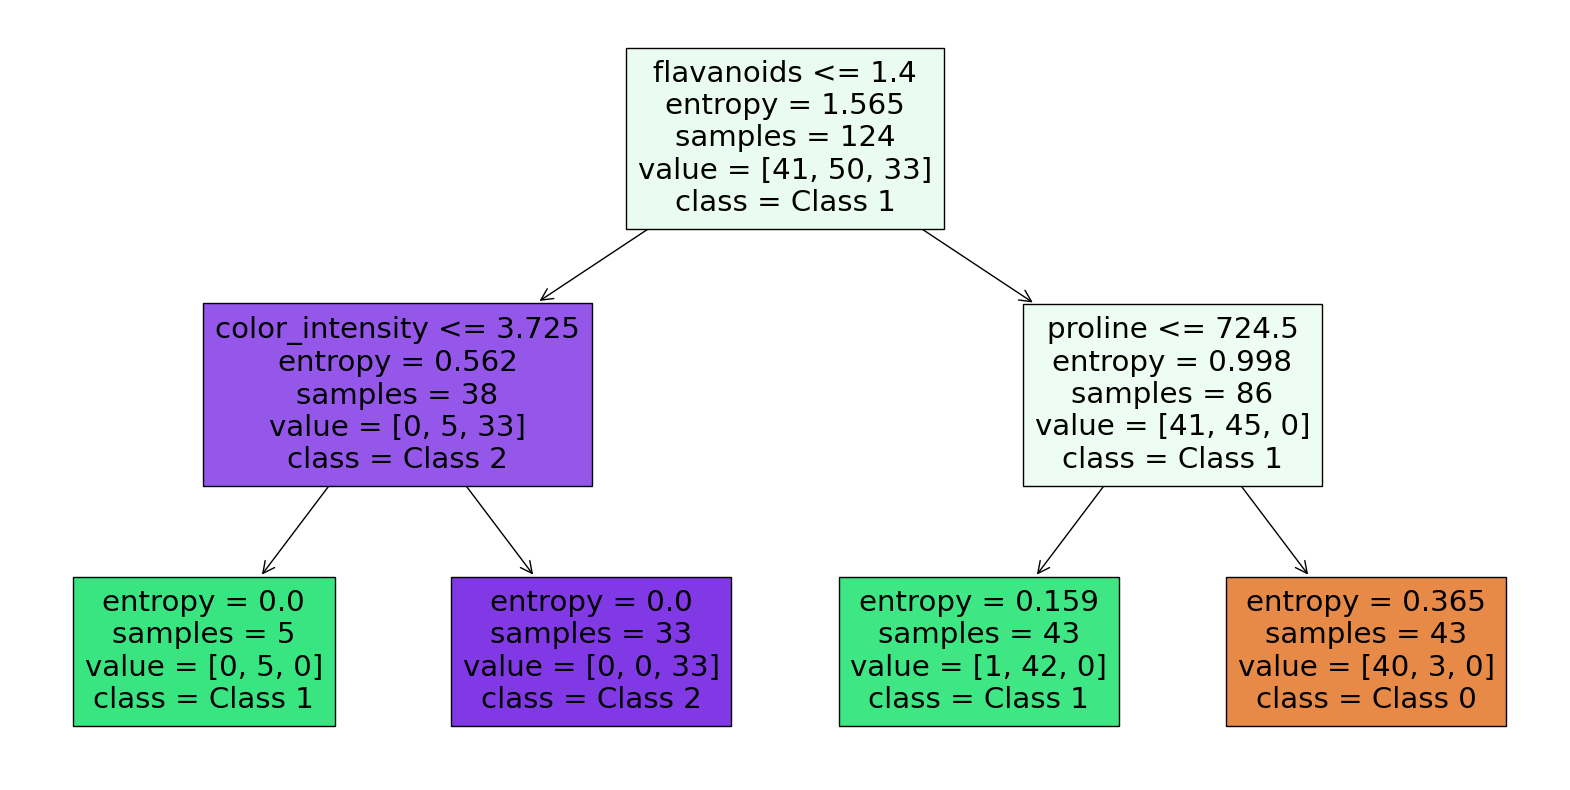

In [35]:
# Visualize the tree
plt.figure(figsize=(20,10))
feature_names = X_train.columns
plot_tree(model, feature_names=feature_names, filled=True,class_names=['Class 0','Class 1','Class 2'])
plt.show()

### 2) log_loss

Accuracy: 0.963


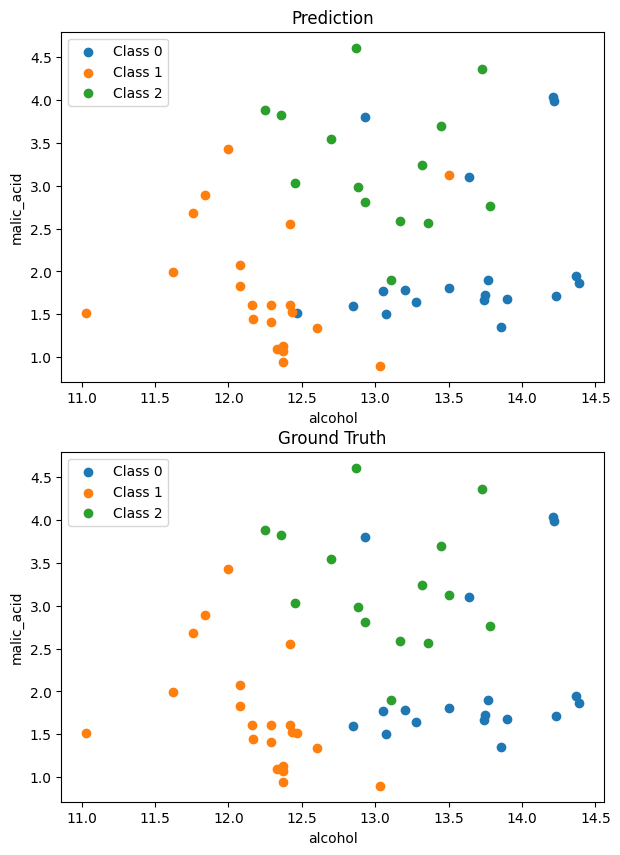

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize decision tree classifier
model = DecisionTreeClassifier(criterion='log_loss', max_depth=2, min_samples_split=2, min_samples_leaf=2, random_state=2023)

# Train decision tree classifier
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc,3))

# Visualization
draw_classification_result(y_pred)

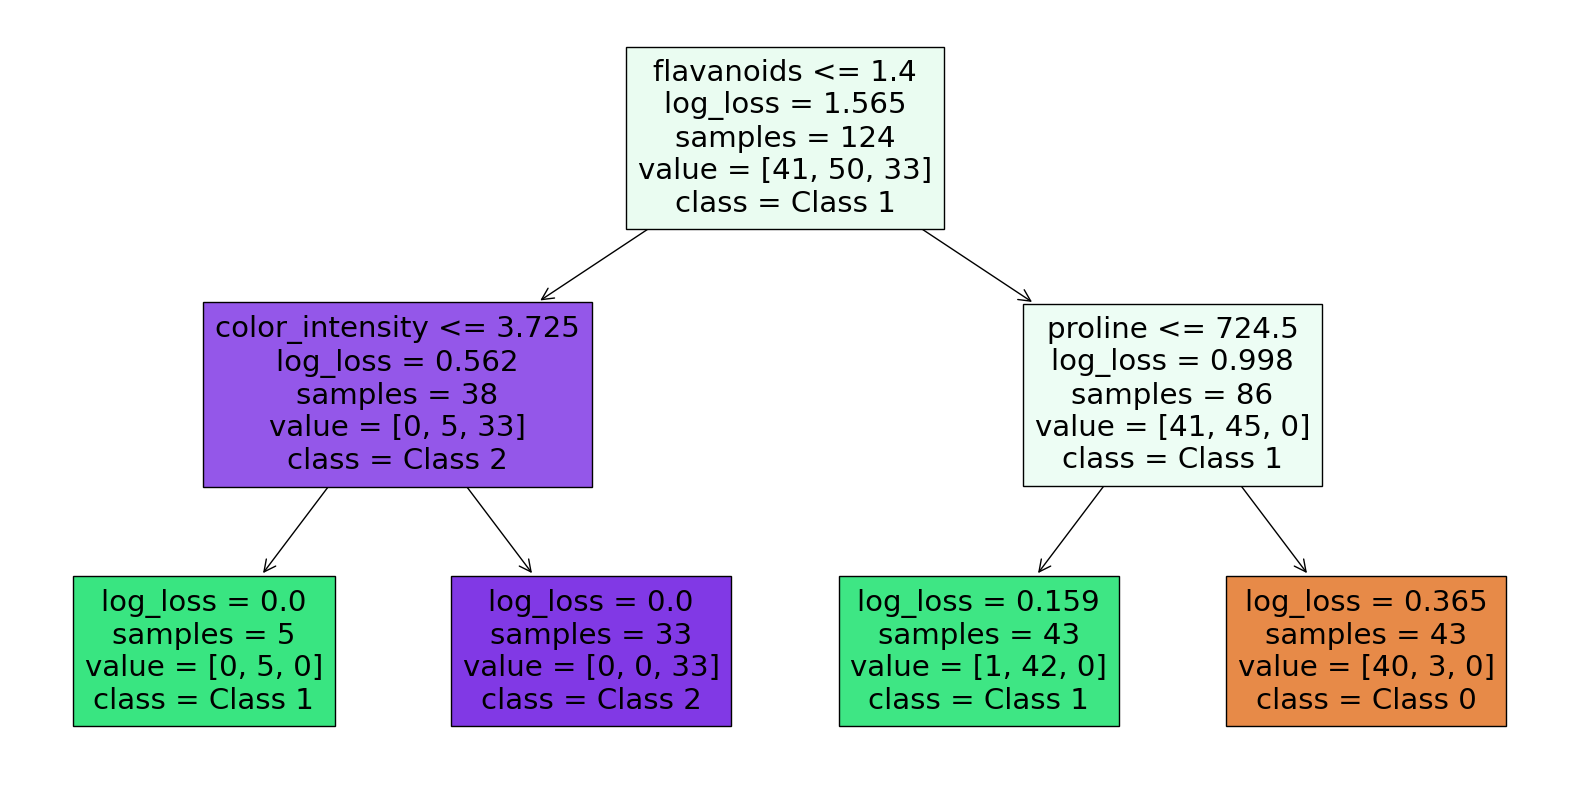

In [43]:
# Visualize the tree
plt.figure(figsize=(20,10))
feature_names = X_train.columns
plot_tree(model, feature_names=feature_names, filled=True,class_names=['Class 0','Class 1','Class 2'])
plt.show()